In [113]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [132]:
csv_file = pd.read_csv("koreahouse.csv", encoding="euc-kr")
data = glob.glob("*.csv")
for csv_data in data:
    csv_read = pd.read_csv(csv_data, encoding="euc-kr")
        
def delete_data(data):
    print(data.isnull().sum())
    del data["대지권면적"]
    del data["Unnamed: 7"]
    print(data)
    return data


def pre_processing(first_data):
    csv_file = delete_data(first_data)
    csv_save = pd.DataFrame(csv_file).to_csv("pre_seoul_aprtment.csv",
                                             index=False,
                                             index_label=False)
    return csv_save

first_data_presing = delete_data(csv_file)

C:\Users\computer\.conda\envs\tmclass-3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


자치구명              0
법정동명              0
신고년도              0
대지권면적         86854
건물면적              0
건물주용도             0
물건금액              0
Unnamed: 7    12431
dtype: int64
       자치구명 법정동명  신고년도    건물면적 건물주용도        물건금액
0       성북구  장위동  2020   59.92   아파트   749000000
1       성북구  길음동  2020   84.77   아파트  1200000000
2       구로구  구로동  2020   36.90   아파트   105000000
3       용산구  산천동  2020   59.55   아파트   830000000
4       용산구  이촌동  2020   64.43   아파트   735000000
...     ...  ...   ...     ...   ...         ...
175996  마포구  상암동  2020  294.03  단독주택  1450000000
175997  마포구  연남동  2020  147.34  단독주택  2430000000
175998  마포구  망원동  2020   46.77  연립주택   405000000
175999  마포구  신수동  2020   46.41  단독주택   899900000
176000  마포구  신정동  2020   25.69  단독주택  1358000000

[176001 rows x 6 columns]


KeyError: '광진구'

In [115]:
from random import shuffle
seoul_index = first_data_presing["자치구명"][:10000]
home_index = first_data_presing["건물주용도"][:10000]
arch_place = first_data_presing["건물면적"][:10000] # x
arch_price = first_data_presing["물건금액"][:10000] # y
L = [seoul_index, home_index, arch_place, arch_price]
for i in L:
  shuffle(i)

print(arch_place[0:5])

0     84.94
1     64.85
2     79.93
3    115.56
4     34.21
Name: 건물면적, dtype: float64


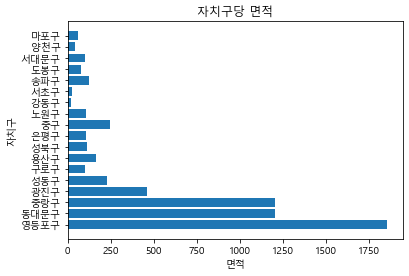

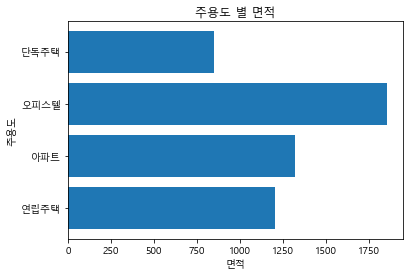

In [116]:
plt.rc('font', family='Malgun Gothic')

# 자치구당 면적 
plt.barh(seoul_index, arch_place)
plt.xlabel("면적")
plt.ylabel("자치구")
plt.title("자치구당 면적")
plt.show()

# 주용도 별 면적 
plt.barh(home_index, arch_place)
plt.xlabel("면적")
plt.ylabel("주용도")
plt.title("주용도 별 면적")
plt.show()

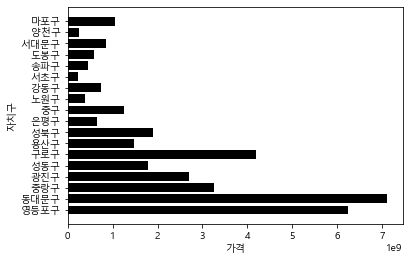

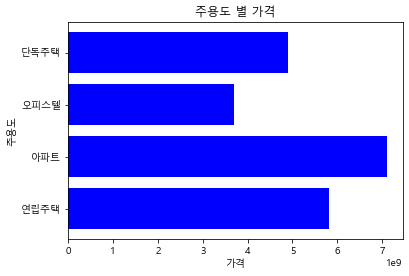

In [117]:
# 자치구 대비 가격 
plt.barh(seoul_index, arch_price, color='black')
plt.xlabel("가격")
plt.ylabel("자치구")
plt.show()
plt.title("자치구 대비 가격")

# 주용도 별 가격 

plt.barh(home_index, arch_price, color='blue')
plt.xlabel("가격")
plt.ylabel("주용도")
plt.title("주용도 별 가격")
plt.show()

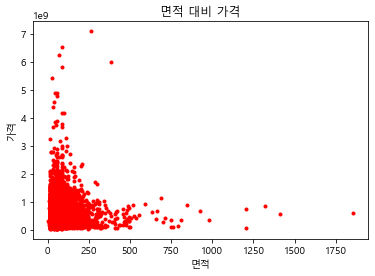

In [118]:
# 면적 대비 가격 
plt.plot(arch_place, arch_price, "r.", label="면적 대비 가격 ")
plt.xlabel("면적")
plt.ylabel("가격")
plt.title("면적 대비 가격")
plt.show()

In [119]:
architecture_mapping = {"아파트": 0,
                        "연립주택": 1,
                        "단독주택": 2,
                        "오피스텔": 3}

buliding = home_index.map(architecture_mapping)

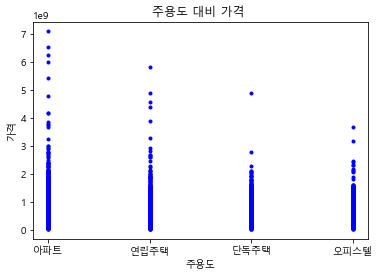

In [120]:
# 주용도 별 가격 
plt.plot(buliding, arch_price, "b.", label="주용도별 가격")
plt.xlabel("주용도")
plt.ylabel("가격")
plt.xticks([0,1,2,3], ["아파트","연립주택","단독주택","오피스텔"])
plt.title("주용도 대비 가격 ")
plt.show()

(454, 1)
(114, 1)
linear train score --> 76.80016351894191
linear test score --> 70.99021757757393


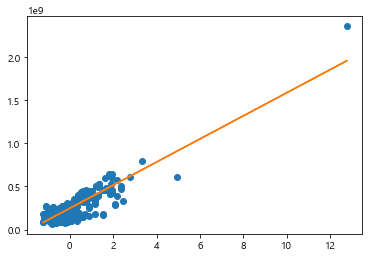

In [134]:
"""
bulid = []
price = []
data = glob.glob("*.csv")
for csv_data in data:
    csv_build = pd.read_csv(csv_data, encoding="euc-kr")["건물면적"]
    csv_price = pd.read_csv(csv_data, encoding="euc-kr")["물건금액"]
    bulid.append(csv_build)
    price.append(csv_price)
    print(csv_build.shape)
    print(csv_price.shape)
y = pd.concat(bulid, ignore_index=True)
X = pd.concat(price, ignore_index=True)
"""
data = pd.read_csv('tests.csv', encoding="euc-kr")
X = data['건물면적']
y = data['물건금액']
# 데이터셋 나누기 
def data_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

    return X_train, X_test, y_train, y_test

# 데이터 스케일링 
def data_scaliing(X_train, X_test):
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train.values.reshape(-1, 1))
    X_test_std = sc.fit_transform(X_test.values.reshape(-1, 1))
    print(X_train_std.shape)
    print(X_test_std.shape)
    return X_train_std, X_test_std

# 선형회귀 모델 
def linear_model(X_train_std, y_train, X_test_std, y_test): 
    linear = LinearRegression()
    linear.fit(X_train_std, y_train)
    print(f"linear train score --> {linear.score(X_train_std, y_train)*100}")
    print(f"linear test score --> {linear.score(X_test_std, y_test)*100}")
    
    plt.plot(X_train_std, y_train, 'o')
    plt.plot(X_train_std, linear.predict(X_train_std.reshape(-1, 1)))
    plt.show()

X_train_std, X_test_std = data_scaliing(data_split()[0], data_split()[1])
linear_model(X_train_std, data_split()[2], X_test_std, data_split()[3])

